In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn import preprocessing   #package for normalize
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Data/EastWestAirlines.xlsx"

In [4]:
sheet_name = "data"

In [5]:
data = pd.read_excel(path, sheet_name=sheet_name)

In [6]:
data.head(10)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [9]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
We know how critical outliers are for clustering. So let's observe and clean out the outliers with the boxplot.
Let's see the outliers of all our columns using `sns.boxplot` inside the for loop.

In [10]:
data_keys = list(data.keys())

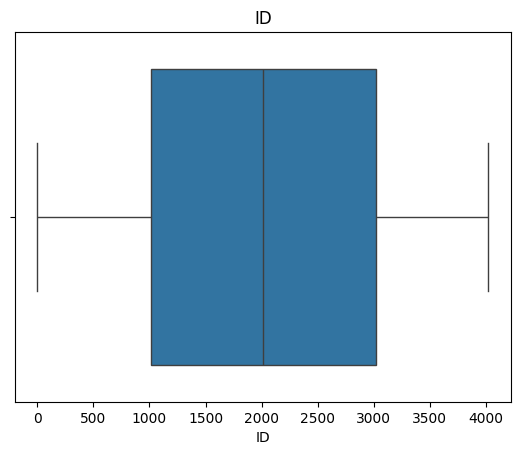

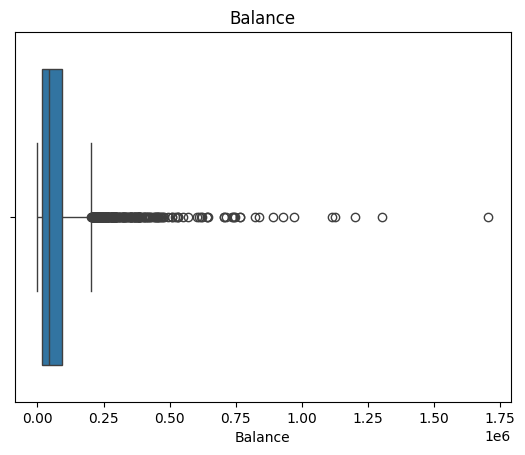

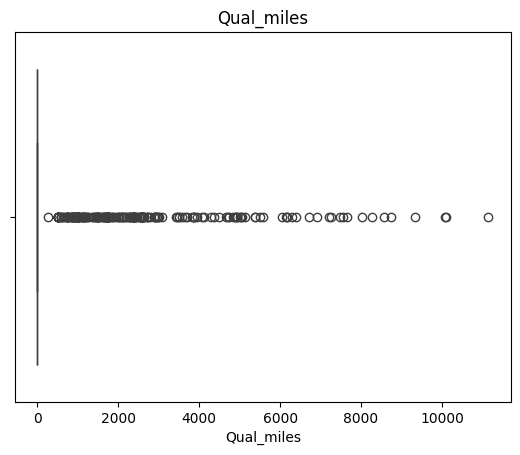

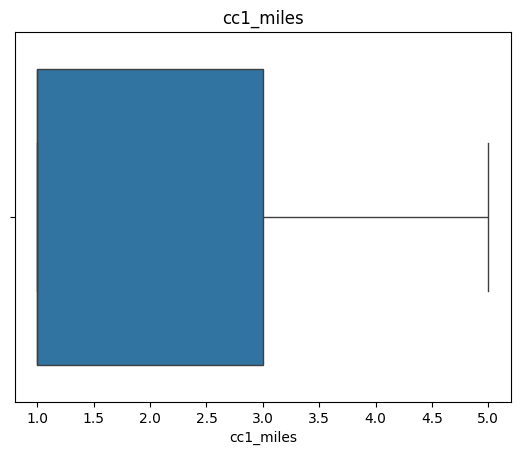

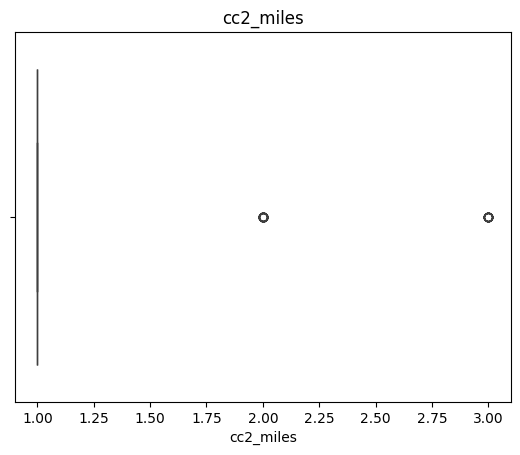

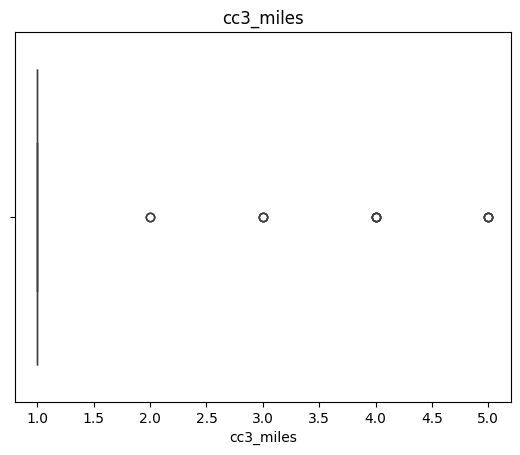

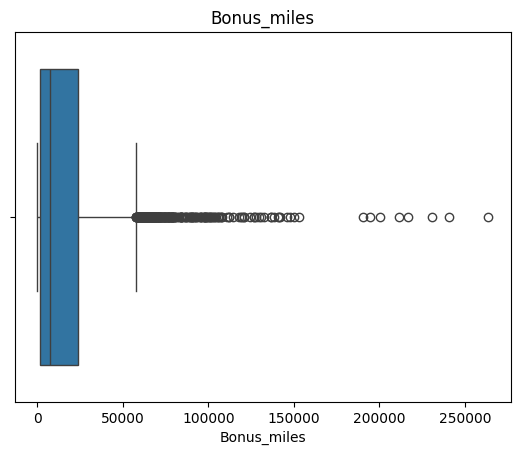

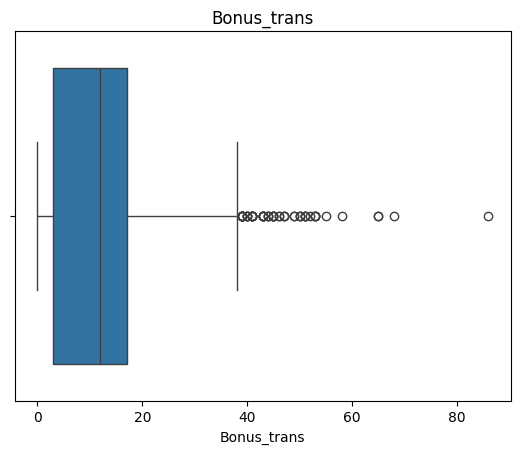

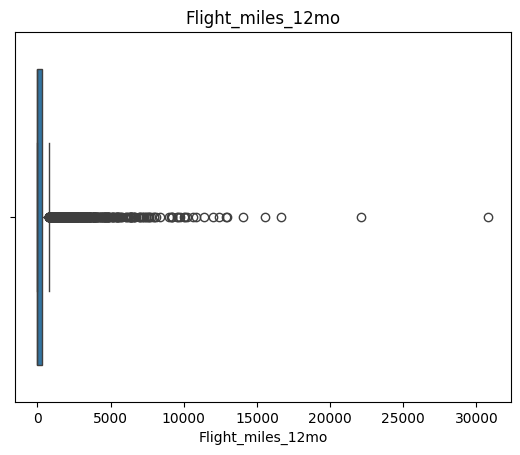

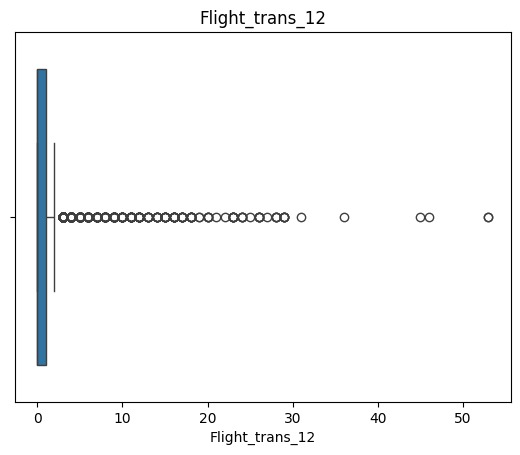

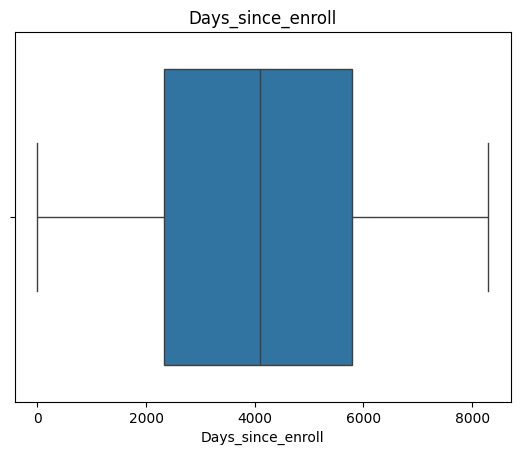

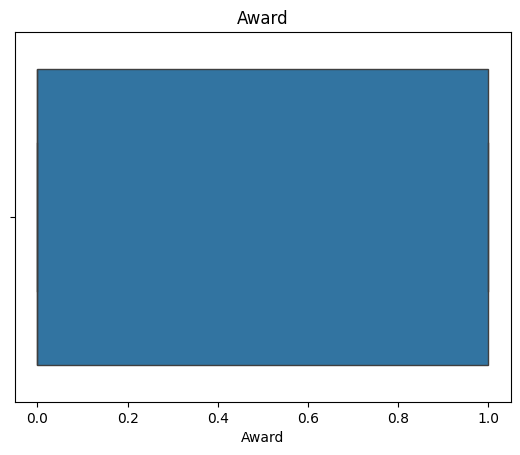

In [11]:
for i in data_keys:
    sns.boxplot(x=i, data=data)
    plt.title(i)
    plt.show()

In [12]:
for i in ['Balance','Bonus_miles','Flight_miles_12mo','Bonus_trans']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR
    df = data[(data[i]>alt_sinir) & (data[i]<ust_sinir)]
    data = df

In [13]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1


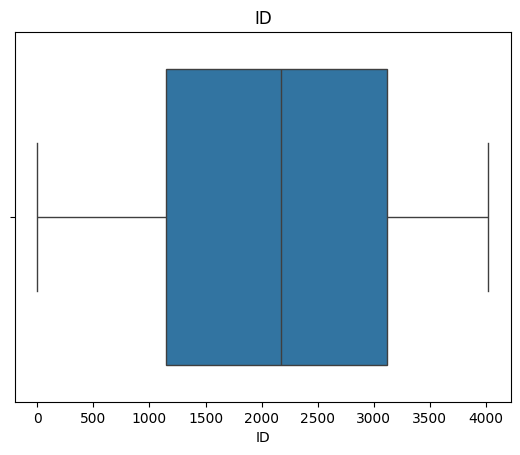

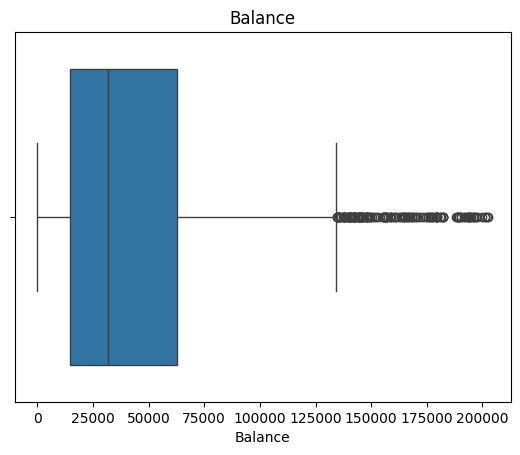

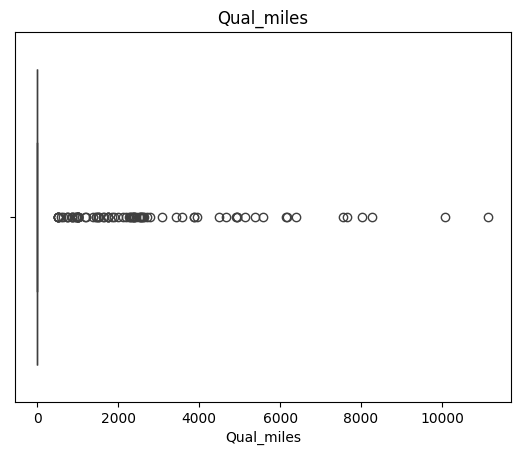

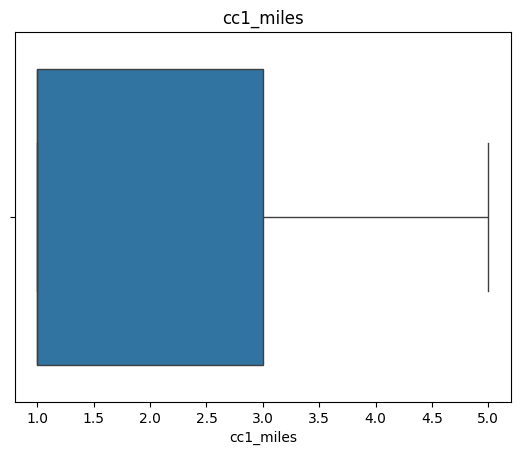

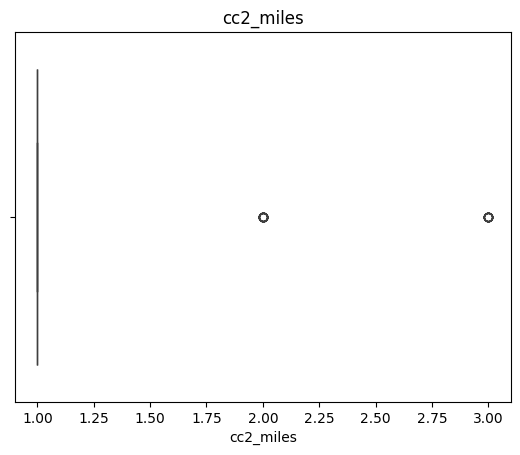

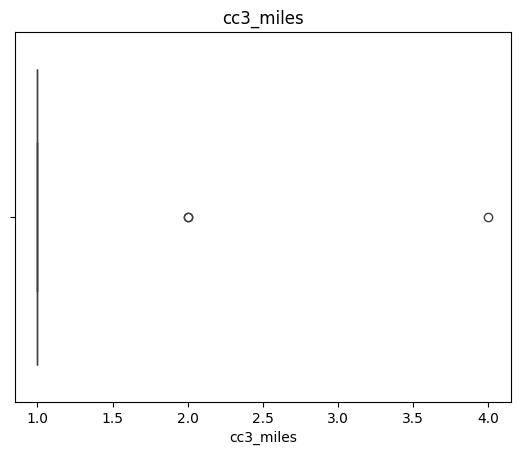

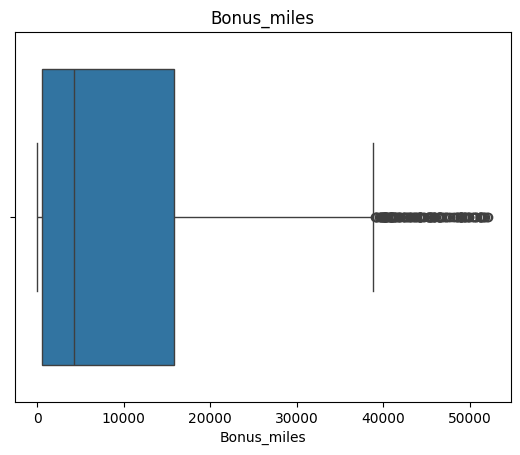

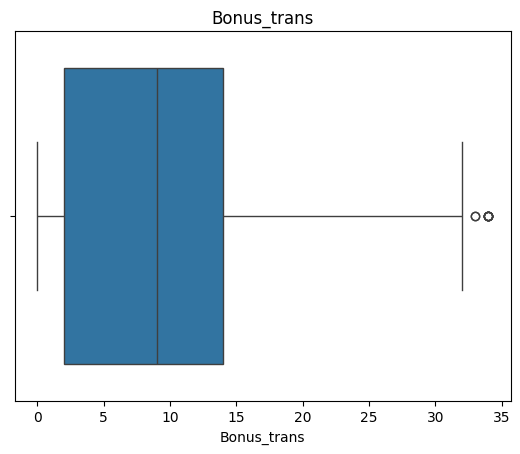

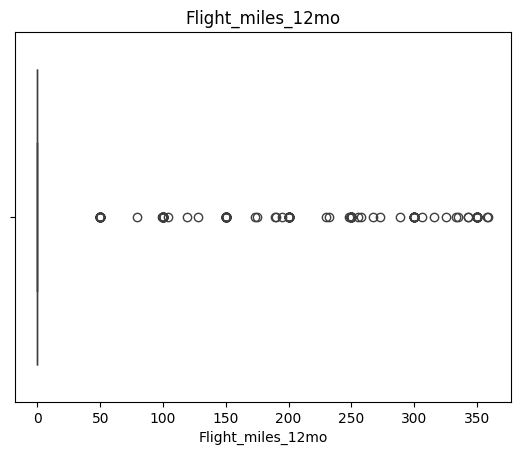

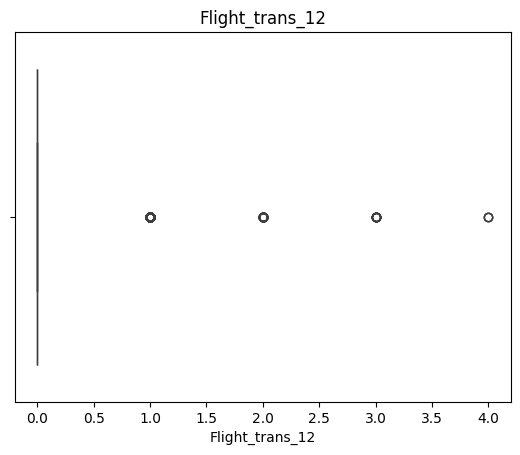

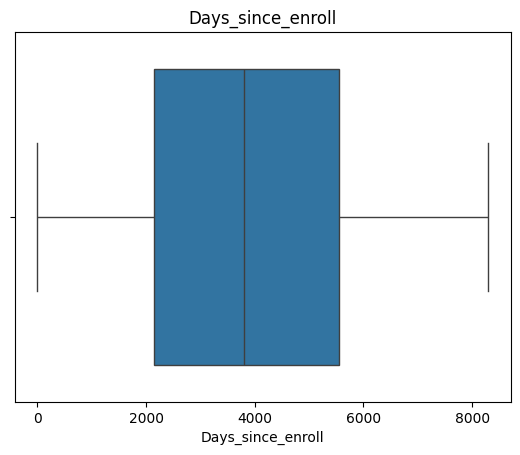

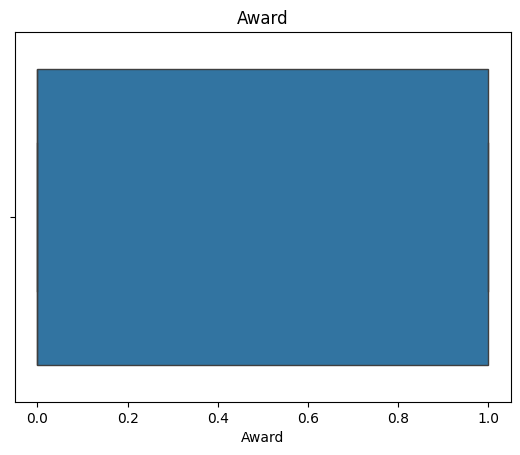

In [14]:
data_keys2 = list(df.keys())
for i in data_keys2:
    sns.boxplot(x=i, data=df)
    plt.title(i)
    plt.show()

In [15]:
df.drop(["ID","Award"],axis=1,inplace=True)

In [16]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


In [17]:
df_normalized= preprocessing.normalize(df)
print(df_normalized)

[[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  0.00000000e+00 2.41370883e-01]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  0.00000000e+00 3.40437193e-01]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  0.00000000e+00 1.66879855e-01]
 ...
 [9.99649387e-01 0.00000000e+00 1.55261223e-05 ... 0.00000000e+00
  0.00000000e+00 2.16589407e-02]
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  0.00000000e+00 1.80009571e-02]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  0.00000000e+00 4.20545513e-01]]


In [19]:
a = linkage(df_normalized, method = "complete", metric = "euclidean")

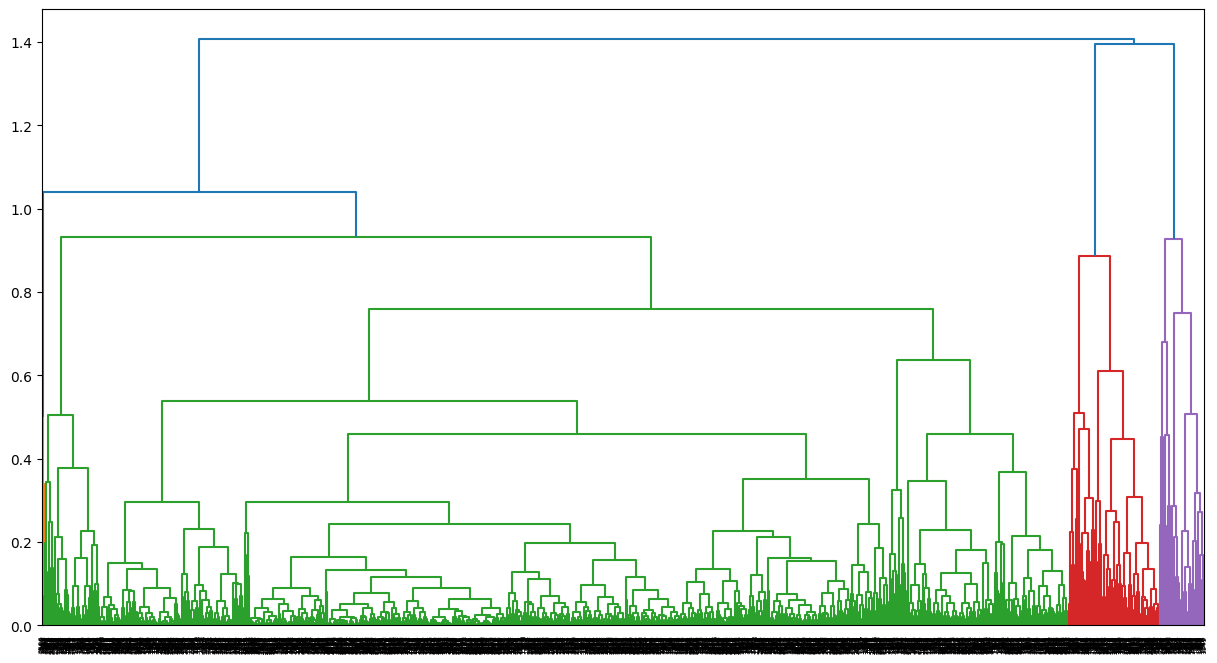

In [20]:
plt.figure(figsize=(15, 8))
dendrogram(a)
plt.show()

In [ ]:
#The seperation in Complete Method indicate that 4 is the optimal number for clusters.

In [21]:
hierarchical_clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(df_normalized)
hierarchical_clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [22]:
cluster_labels = pd.Series(hierarchical_clustering.labels_)

In [ ]:
#We add the `clusters` column to the dataframe as a new column to see the cluster where each row is located.

In [23]:
df['clusters'] = cluster_labels

In [24]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0.0
5,16420,0,1,1,1,0,0,0,0,6942,0.0


In [25]:
print("Clustering Score:", (silhouette_score(df_normalized, hierarchical_clustering.labels_)*100).round(3))

Clustering Score: 51.566


In [26]:
w = df.iloc[:, 0:].groupby(df.clusters).mean()
w

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
clusters,,,,,,,,,,,
0.0,51326.406780,80.859385,1.903327,1.015066,1.000628,11410.512869,9.649718,20.088512,0.129944,5017.913371,0.0
1.0,59276.349206,86.460317,2.126984,1.000000,1.000000,12905.936508,10.047619,14.285714,0.142857,5608.825397,1.0
2.0,46230.268116,86.268116,1.724638,1.014493,1.000000,10053.398551,9.507246,26.449275,0.202899,5144.376812,2.0
3.0,41899.600000,200.000000,1.400000,1.000000,1.000000,6113.000000,4.600000,30.000000,0.200000,4204.400000,3.0


In [ ]:
#0 ==> The second most winning group of cards and the third most flying customer group. (Silver member)

#1 ==> The group of customers who earn the most from cards and fly most often. (Diamond member)

#2 ==> The customer group that is the second in the third frequency of flights on the cards. (Gold member)

#3 ==> The group that won the least and flew the least. (Bronze member)

In [27]:
cluster1 = pd.DataFrame(df.loc[df.clusters==0].mean(),columns= ['silver_customer'])
cluster2 = pd.DataFrame(df.loc[df.clusters==1].mean(),columns= ['diamond_customer'])
cluster3 = pd.DataFrame(df.loc[df.clusters==2].mean(),columns= ['gold_customer'])
cluster4 = pd.DataFrame(df.loc[df.clusters==3].mean(),columns= ['bronze_customer'])

In [28]:
average_cluster_df = pd.concat([cluster1,cluster2,cluster3,cluster4],axis=1)
average_cluster_df

,silver_customer,diamond_customer,gold_customer,bronze_customer
Balance,51326.406780,59276.349206,46230.268116,41899.6
Qual_miles,80.859385,86.460317,86.268116,200.0
cc1_miles,1.903327,2.126984,1.724638,1.4
cc2_miles,1.015066,1.000000,1.014493,1.0
cc3_miles,1.000628,1.000000,1.000000,1.0
Bonus_miles,11410.512869,12905.936508,10053.398551,6113.0
Bonus_trans,9.649718,10.047619,9.507246,4.6
Flight_miles_12mo,20.088512,14.285714,26.449275,30.0
Flight_trans_12,0.129944,0.142857,0.202899,0.2
Days_since_enroll,5017.913371,5608.825397,5144.376812,4204.4


In [ ]:
#When we look at how many elements each set has, we see that too many elements accumulate in a set.

#This is the reason why our clustering score is not good.

In [29]:
df.groupby(['clusters']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clusters,,,,,,,,,,
0.0,1593,1593,1593,1593,1593,1593,1593,1593,1593,1593
1.0,63,63,63,63,63,63,63,63,63,63
2.0,138,138,138,138,138,138,138,138,138,138
3.0,5,5,5,5,5,5,5,5,5,5


In [30]:
new_df = df.drop(['clusters'],axis=1)
new_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


In [31]:
new_df.shape

(2744, 10)

In [32]:
2744/20

137.2

In [33]:
np.random.seed(425)
n_remove = 137
drop_n = np.random.choice(new_df.index, n_remove, replace=False)
df_95_percent = new_df.drop(drop_n)
df_95_percent

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


In [34]:
#new_df_normalized = preprocessing.normalize(df_95_percent)
#print(new_df_normalized)
scaler = StandardScaler()
new_df_normalized = scaler.fit_transform(df_95_percent)
print(new_df_normalized)

[[-0.40781308 -0.13688573 -0.69320189 ... -0.28853391 -0.29176958
   1.49968963]
 [-0.62099032 -0.13688573 -0.69320189 ... -0.28853391 -0.29176958
   1.48415529]
 [-0.09134107 -0.13688573 -0.69320189 ... -0.28853391 -0.29176958
   1.51619486]
 ...
 [ 0.46037092 -0.13688573 -0.69320189 ... -0.28853391 -0.29176958
  -1.22124638]
 [ 0.68104613 -0.13688573  1.12854945 ... -0.28853391 -0.29176958
  -1.21784824]
 [-1.00973514 -0.13688573 -0.69320189 ... -0.28853391 -0.29176958
  -1.21979003]]


In [35]:
b = linkage(new_df_normalized, method = "complete", metric = "euclidean")

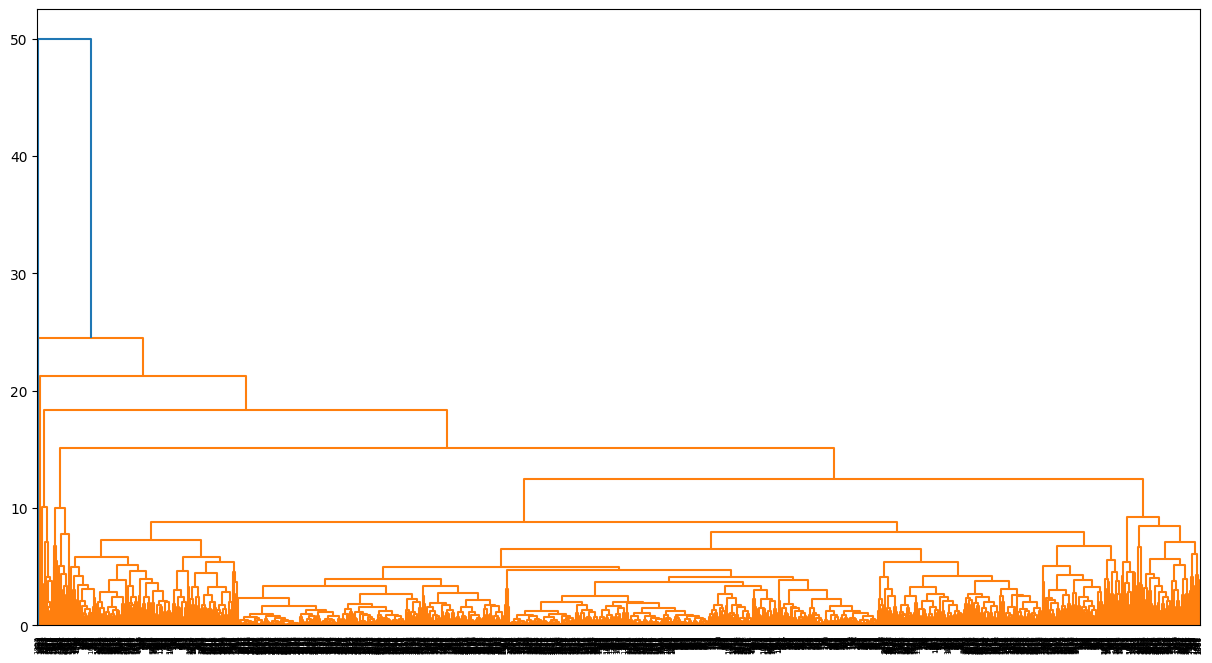

In [36]:
plt.figure(figsize=(15, 8))
dendrogram(b)
plt.show()

In [37]:
new_hierarchical_clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(new_df_normalized)
new_hierarchical_clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print("Clustering Score:", (silhouette_score(new_df_normalized, new_hierarchical_clustering.labels_)*100).round(3))

Clustering Score: 75.608


In [41]:
# Assuming 'new_hierarchical_clustering' contains the fitted AgglomerativeClustering object for the second clustering
# Assuming 'df_95_percent' is the DataFrame with reduced data after preprocessing

# Get cluster labels from the hierarchical clustering for the reduced data
hierarchical_cluster_labels = new_hierarchical_clustering.labels_

# Create a new DataFrame with cluster labels and index aligned with 'df_95_percent'
cluster_df = pd.DataFrame({'hierarchical_clusters': hierarchical_cluster_labels}, index=df_95_percent.index)

# Merge the cluster labels DataFrame with 'df_95_percent' based on index
new_df = pd.merge(df_95_percent, cluster_df, left_index=True, right_index=True)


In [43]:
# Assuming 'new_df' contains the DataFrame with the data and 'hierarchical_clusters' column

# Calculate cluster means based on 'hierarchical_clusters'
z = new_df.groupby(new_df.hierarchical_clusters).mean()
z

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
hierarchical_clusters,,,,,,,,,,
0,45077.193151,65.063101,1.759523,1.014236,1.0,9984.403617,8.996537,19.001154,0.128896,3908.261254
1,100869.000000,0.000000,2.500000,1.000000,2.0,28404.000000,14.500000,0.000000,0.000000,4817.000000
2,66304.800000,8530.400000,2.400000,1.000000,1.0,14557.600000,10.800000,10.000000,0.200000,4932.400000
3,61474.000000,0.000000,1.000000,1.000000,4.0,47717.000000,14.000000,0.000000,0.000000,3354.000000


In [44]:
# Assuming 'new_df' contains the DataFrame with the data and 'hierarchical_clusters' column

# Group and count rows based on 'hierarchical_clusters'
cluster_counts = new_df.groupby(['hierarchical_clusters']).size()


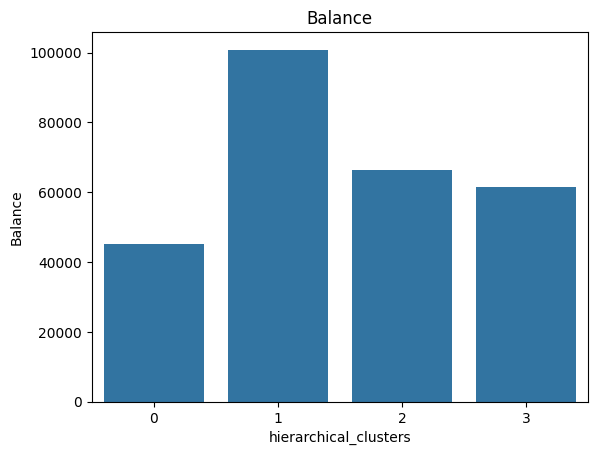

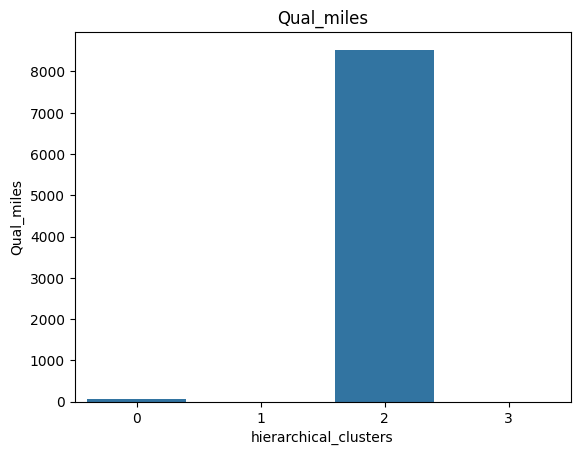

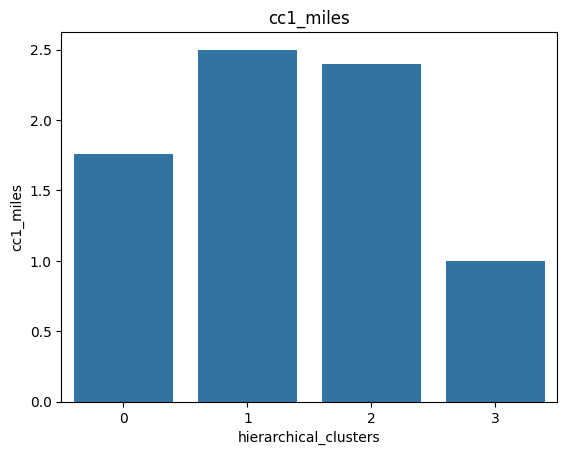

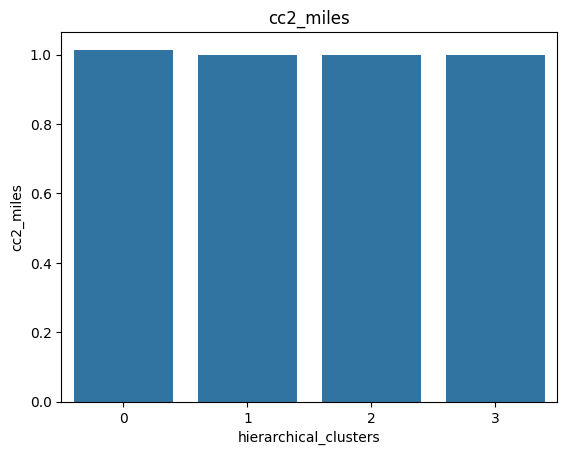

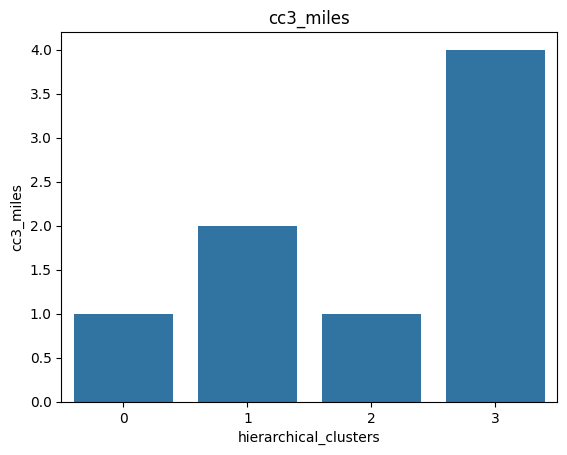

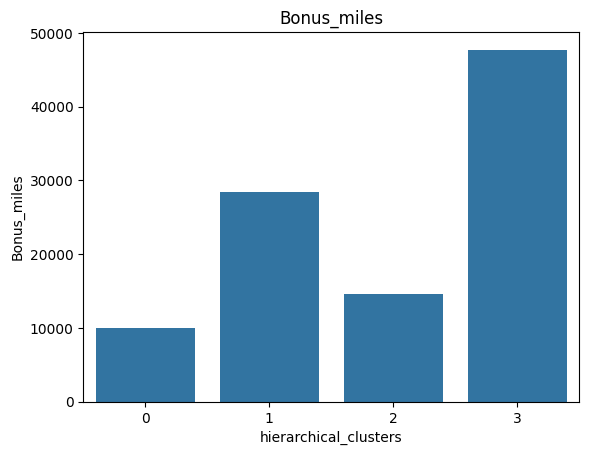

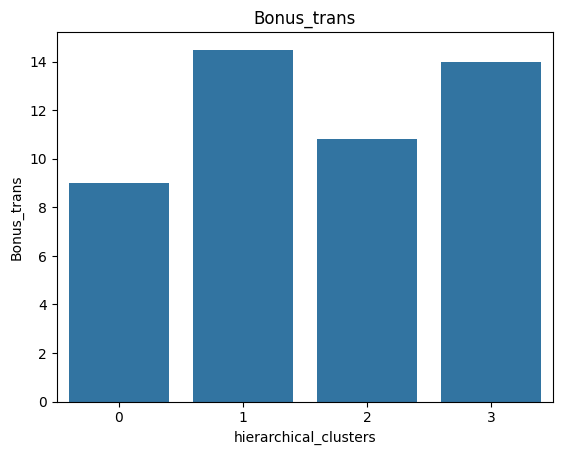

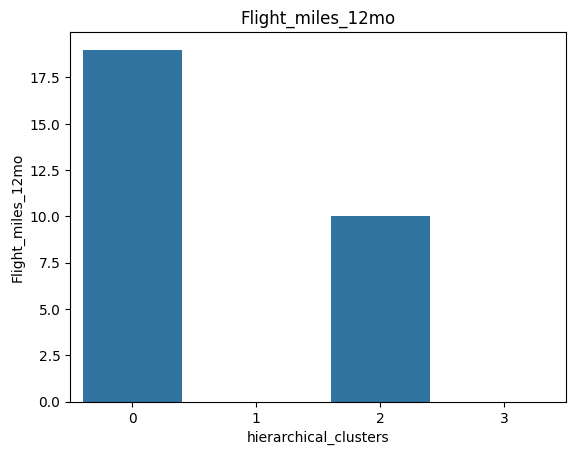

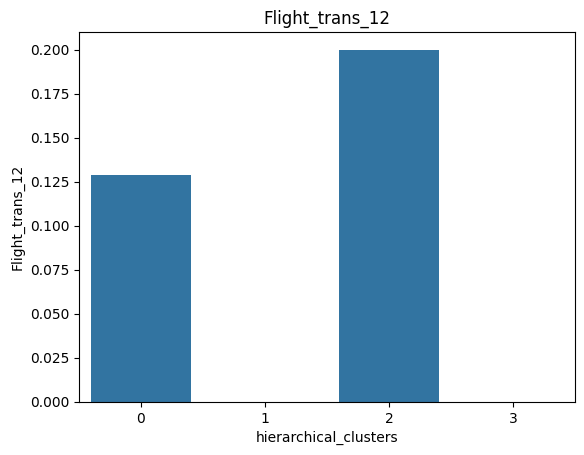

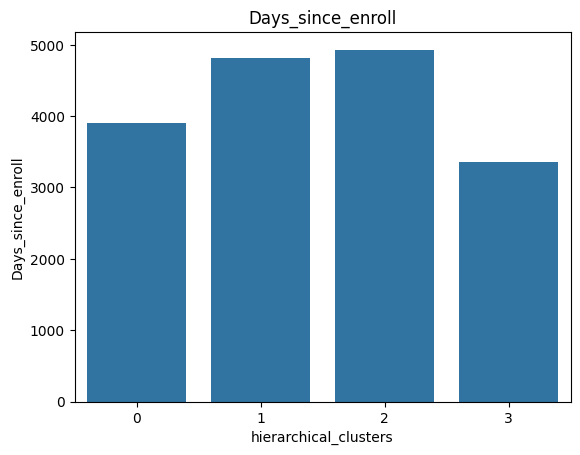

In [45]:
# Assuming 'z' contains the cluster means DataFrame based on 'hierarchical_clusters'

for i in list(z.keys()):
    sns.barplot(data=z, x='hierarchical_clusters', y=i)
    plt.title(i)
    plt.show()


In [ ]:
#3 ==> The second most winning group of cards and the third most flying customer group. (Silver member)

#2 ==> The group of customers who earn the most from cards and fly most often. (Diamond member)

#0 ==> The last in the third frequency of flights on the cards is the customer group. (Bronze member)

#1 ==> The group that won the least and flew the second most. (Gold member)

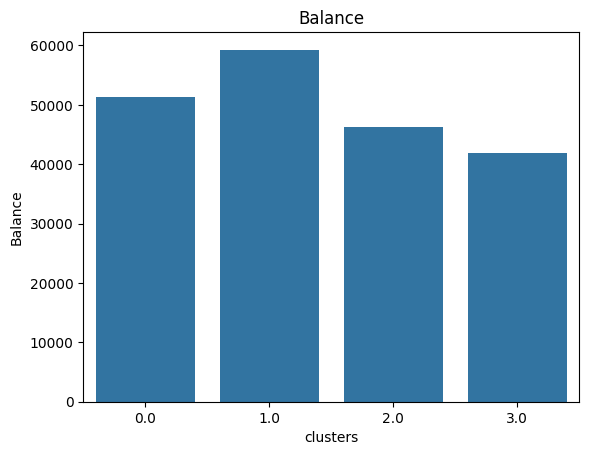

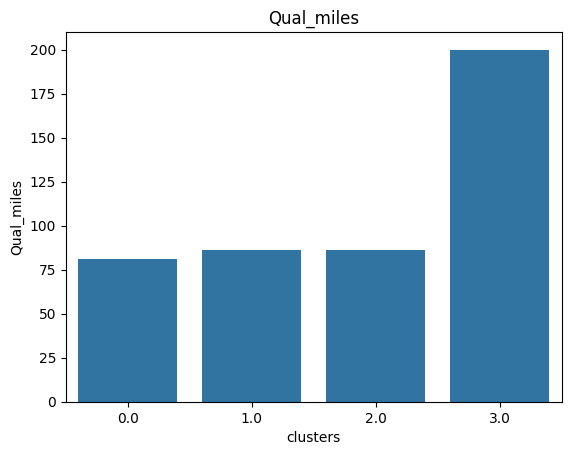

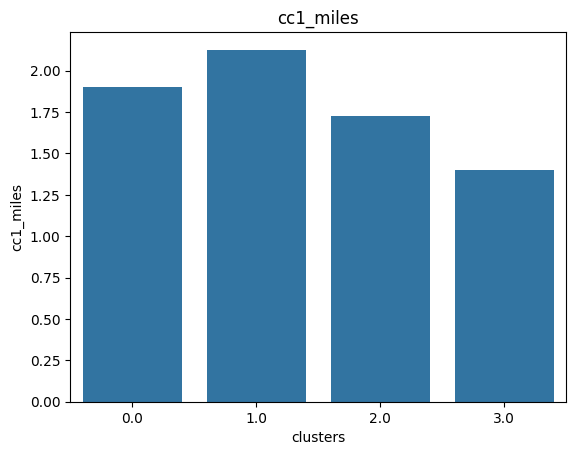

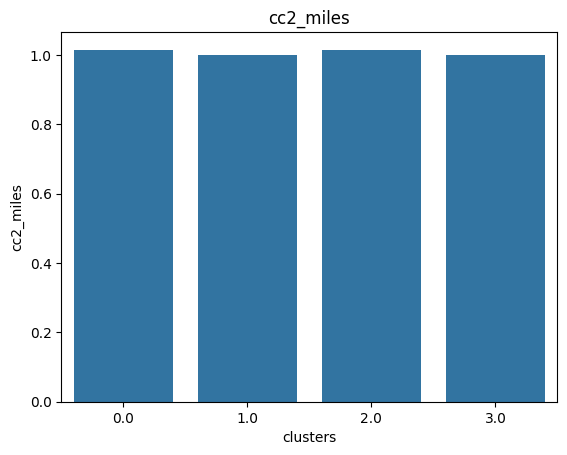

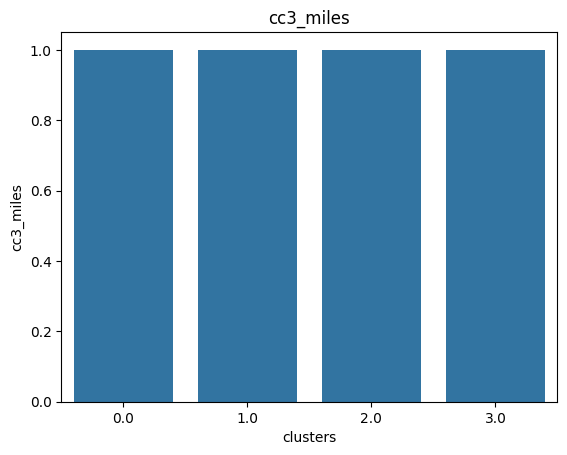

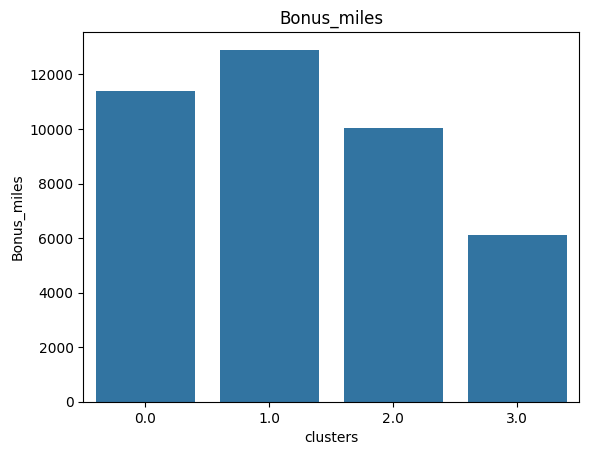

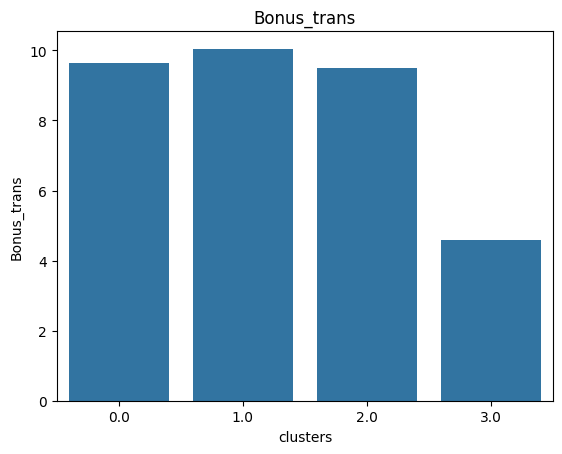

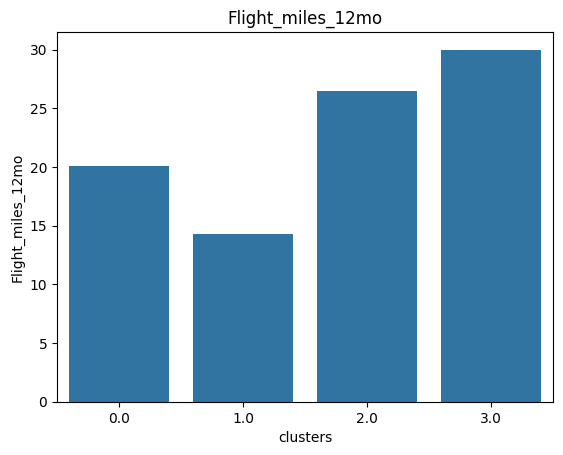

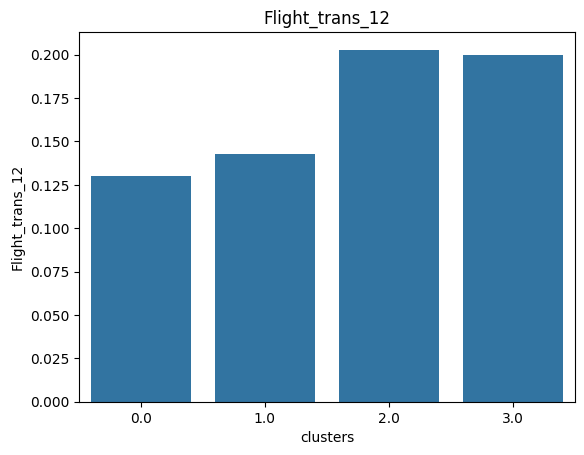

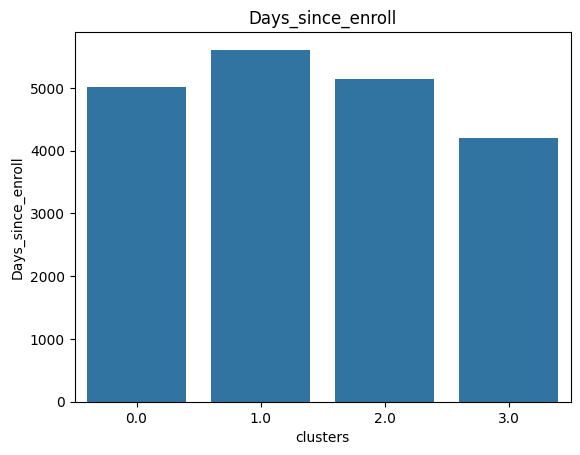

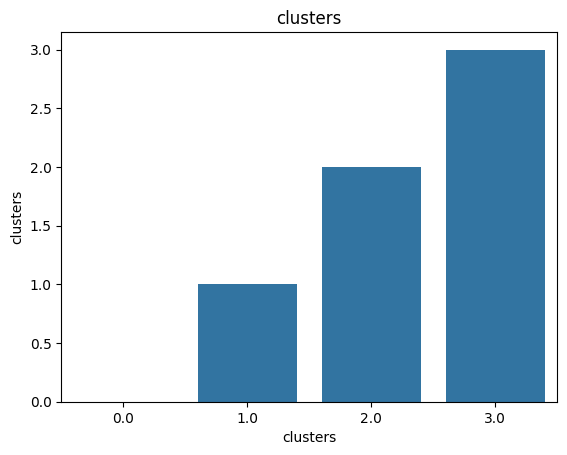

In [48]:
for i in list(w.keys()):
    sns.barplot(data=w,x='clusters',y=i)
    plt.title(i)
    plt.show()

#This airline company should treat its diamond customers, who are number 1 in the 2 complete linkage method in the kmeans method, more privileged.
 #(`Diamond customer`) Because they are the customers of this company who fly the most and spend their cards.

 #In addition, more attractive offers and campaigns should be made to win `Bronze customers`. Also, this cluster contains the largest number of people.


#`Silver customers` rank 2nd in card usage, only flying less frequently. To encourage spending these saved miles, we may offer these passengers discounts on first-class seats.
#Passengers will then have an incentive to travel and enjoy first class travel and spend their earned miles, which will benefit the airline and create a win-win situation.


#`Gold members` fly more, but their spending with cards is low. Since they fly in large numbers,
#if we deliver advertisements to these customers where we can show the contribution of card usage to their flight budget, they will increase card usage.